# ------------------- Trabalho 02 - analise de Regressão - Base Auto - MPG -------
base disponivel em: https://www.kaggle.com/datasets/uciml/autompg-dataset

# Alunos: ANDRÉ LUIZ DE ANDRADE - FABRÍCIO RANGEL DE SOUSA

Introdução

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University, utilizado na Carnegie Mellon University em 1983.

Neste estudo, iremos utilizar somente os atributos continuos para nossa análise, com base na classificação tirada do site da Kaggle:

1 - mpg: continuous;

2 - cylinders: multi-valued discrete;

3 - displacement: continuous;

4 - horsepower: continuous;

5 - weight: continuous;

6 - acceleration: continuous;

7 - model year: multi-valued discrete;

8 - origin: multi-valued discrete;

car name: string (unique for each instance)


In [ ]:
# importando as bibliotecas necessárias
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Analisando a base de dados diabetes
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/auto-mpg.csv', sep=',')

# Visualizar as primeiras linhas do DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Pré - Processamento

In [ ]:
# coletando informações da tabela
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [ ]:
# identifica quais colunas possuem valor vazio
print(df.isna().sum())


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
# substitui dados invalidos na coluna horsepower
# A  coluna horsepower contem string e precisam ser convertidas para int, pois como consta na documentação
# para alguns atributos de consumo de combustivel(mpg), a variavel potencia(horsepower)
# ficou com valores invalidos "?"
df['horsepower'] = df['horsepower'].replace('?', pd.NA)

# Eliminar as linhas que contêm NaN na coluna "horsepower"
df = df.dropna(subset=['horsepower']).reset_index(drop=True)

# transformando a coluna em inteiro
df['horsepower'] = df['horsepower'].astype(int)

# coletando informações da tabela
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB
None



# Preparando os dados




In [ ]:

# Eliminando atributos não numericos
df = df.drop(columns='car name')

display(df)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1
388,44.0,4,97.0,52,2130,24.6,82,2
389,32.0,4,135.0,84,2295,11.6,82,1
390,28.0,4,120.0,79,2625,18.6,82,1


# Analisando os dados

1 - analisando a base

In [ ]:
#opcional
import seaborn as sns
import matplotlib.pyplot as plt


display(df.corr()[["mpg"]])



,mpg
mpg,1.000000
cylinders,-0.777618
displacement,-0.805127
horsepower,-0.778427
weight,-0.832244
acceleration,0.423329
model year,0.580541
origin,0.565209


2 - visualizando grafico de mapa de calor

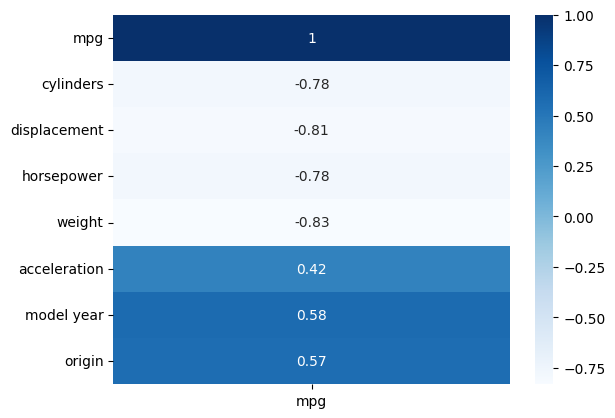

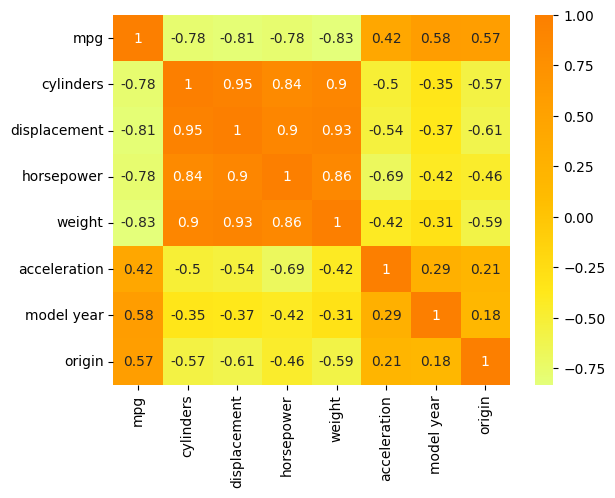

In [ ]:

sns.heatmap(df.corr()[["mpg"]], annot=True, cmap="Blues")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="Wistia")
plt.show()


3 - Visualizando o Grafico de dispersão

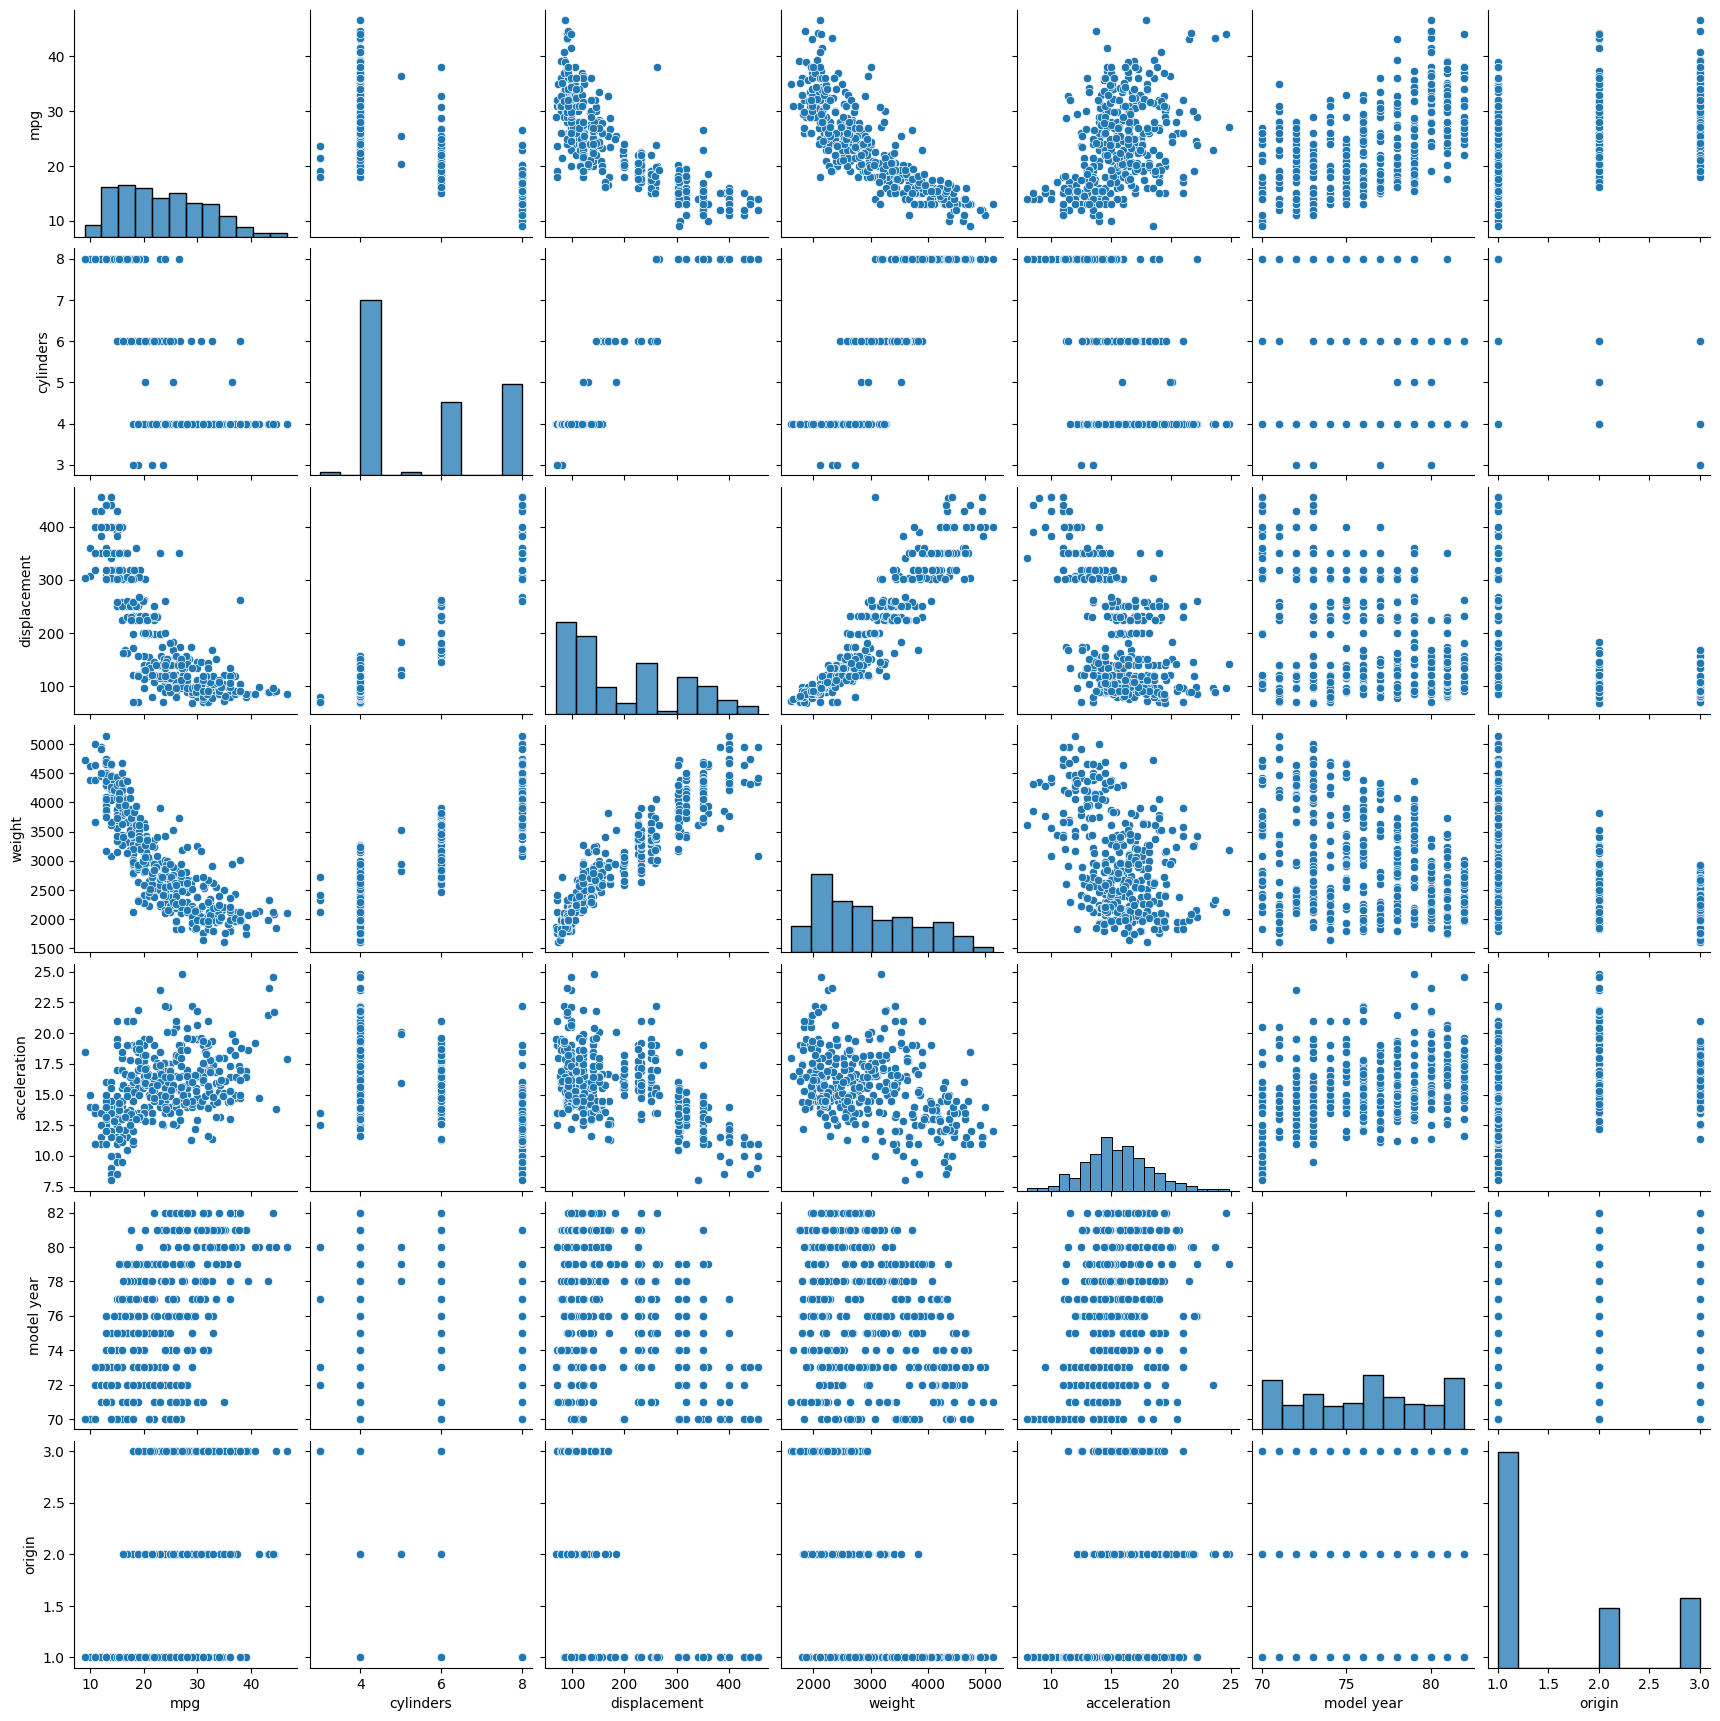

In [ ]:
sns.pairplot(df)
plt.show()


4 - Analise descritiva das estatisticas da base


In [ ]:
# Estatísticas descritivas
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  392.000000  392.000000    392.000000   392.000000    392.000000   
mean    23.445918    5.471939    194.411990  2977.584184     15.541327   
std      7.805007    1.705783    104.644004   849.402560      2.758864   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.000000    4.000000    105.000000  2225.250000     13.775000   
50%     22.750000    4.000000    151.000000  2803.500000     15.500000   
75%     29.000000    8.000000    275.750000  3614.750000     17.025000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  392.000000  392.000000  
mean    75.979592    1.576531  
std      3.683737    0.805518  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


# Selecionando os atributos e a variavel alvo


In [ ]:
# Selecionar somente os atributos continuos

nova_base = df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
nova_base.head()

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130,3504,12.0
1,15.0,350.0,165,3693,11.5
2,18.0,318.0,150,3436,11.0
3,16.0,304.0,150,3433,12.0
4,17.0,302.0,140,3449,10.5


# mapas de calor e dispersão da nova base

,mpg
mpg,1.000000
displacement,-0.805127
horsepower,-0.778427
weight,-0.832244
acceleration,0.423329


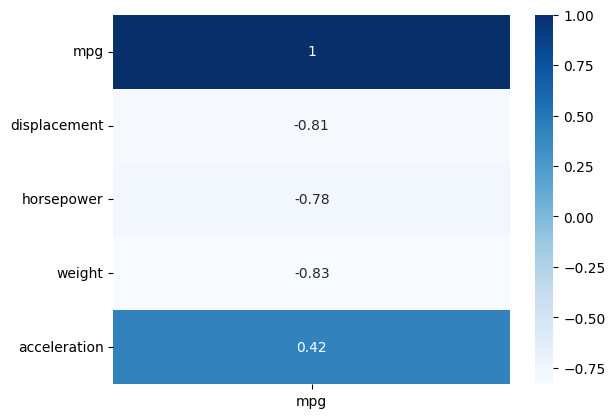

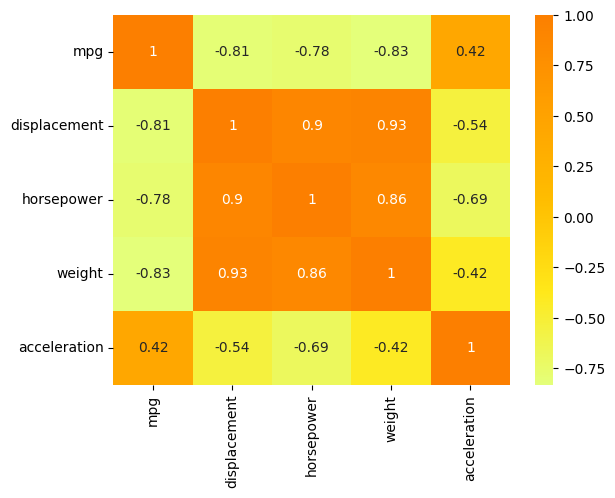

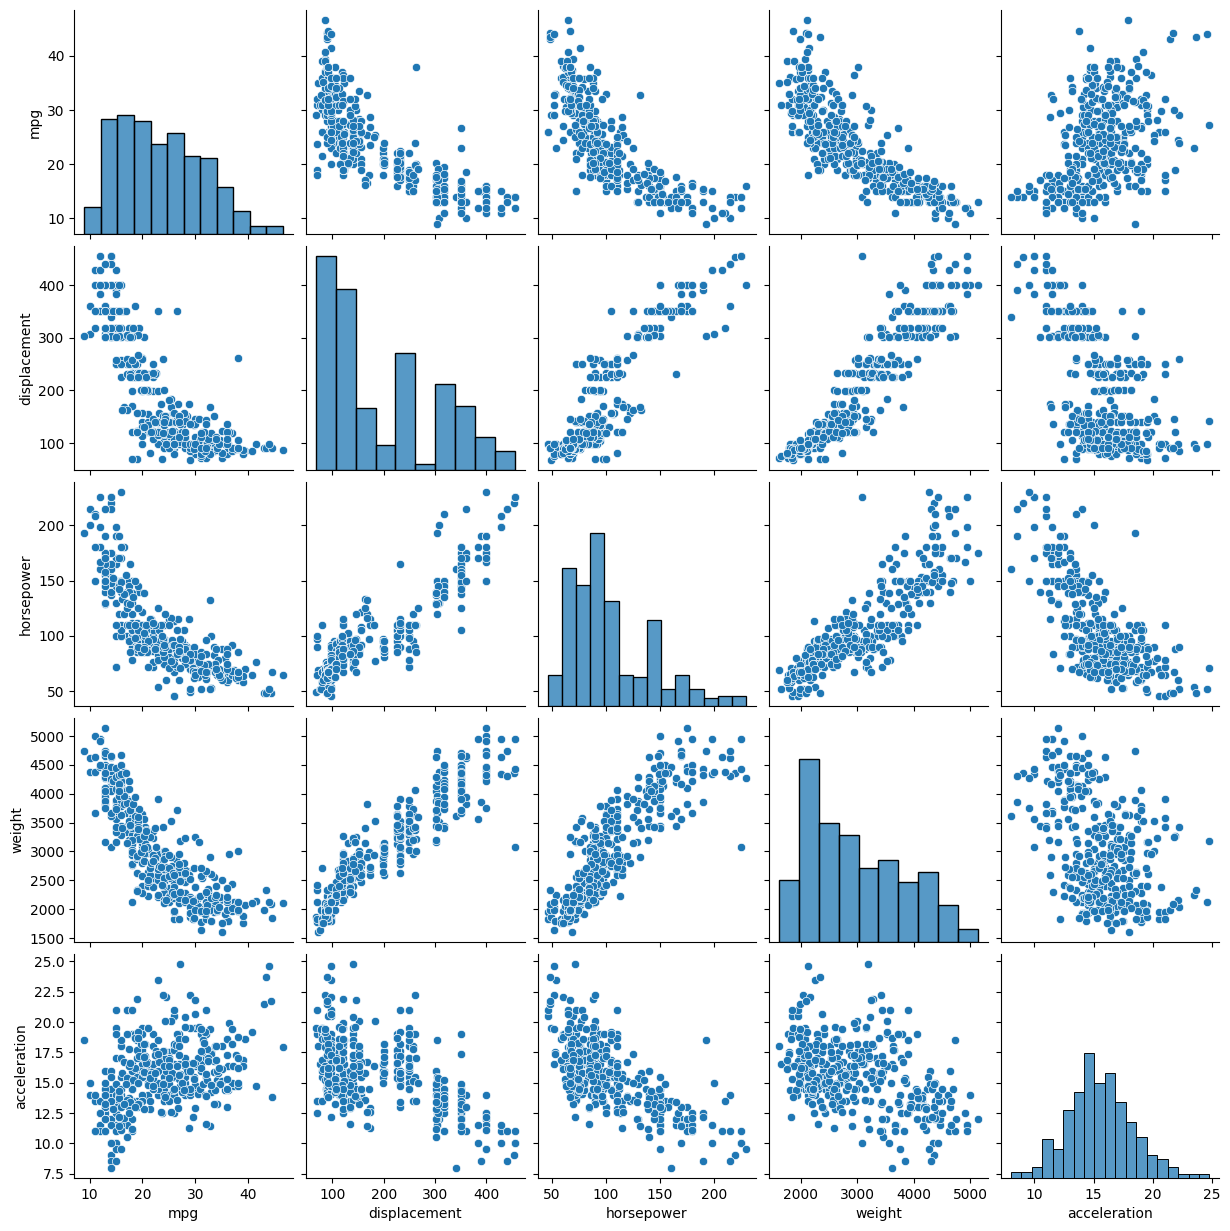

In [ ]:
display(nova_base.corr()[["mpg"]])


sns.heatmap(nova_base.corr()[["mpg"]], annot=True, cmap="Blues")
plt.show()

sns.heatmap(nova_base.corr(), annot=True, cmap="Wistia")
plt.show()

sns.pairplot(nova_base)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


# Atributos
x = nova_base.drop('mpg', axis=1)

# Selecionar a variável alvo
y = nova_base['mpg']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)


# Treinando o modelo de dados

In [ ]:

# escolhendo o modelo de regressão e treinamento
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# Inicializar o modelo de regressão linear
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# Treinar o modelo nos dados
# treinar
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

# Criando as previsões e comparando modelos

In [ ]:
from sklearn import metrics

#criar previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.7209702318140769
0.7328754409375902


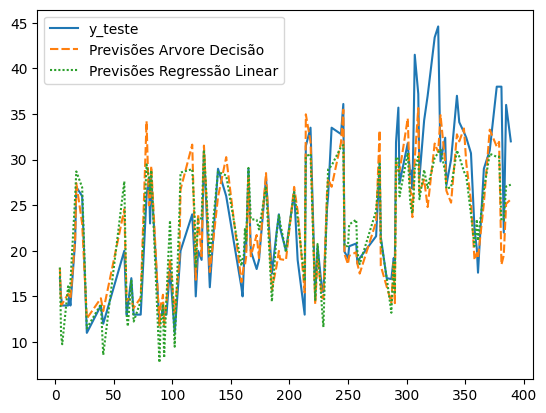

In [ ]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsões Arvore Decisão"] = previsao_arvoredecisao
tabela_auxiliar["Previsões Regressão Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar)
plt.show()


# Calculando o erro quadrático médio (MSE)


In [ ]:
# Calcular o erro quadrático médio (MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_teste, previsao_regressaolinear)
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')

Erro Quadrático Médio (MSE): 18.55


# Calculando o coeficiente de determinação (R2)

In [ ]:
# Calcular o coeficiente de determinação (R²)
r2 = r2_score(y_teste, previsao_regressaolinear)
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Coeficiente de Determinação (R²): 0.72


# **Discussão dos Resultados**

O erro médio quadrático(MSE), quantifica a média dos erros entre os valores reais e valores previstos no modelo estudado. Quanto menor o MSE, melhor o modelo se ajusta aos dados. Em nosso estudo, o MSE foi calculado como uma métrica do modelo de regressão linear.
Já o coeficiente de Determinação(R2), indica a proporção da variação do atributo alvo( em nosso caso, o MPG) em relação as variaveis independentes (atributos do carro). Um valor de R2 mais proximo de 1, significa que o modelo de regressão expressa bem a variabilidade no consumo de combustivel, com base nos atributos escolhidos.

# **Conclusão**

Com base nos resultados obtidos, podemos concluir que o modelo de regressão linear aplicado aos dados do conjunto "auto-mpg" apresentou um desempenho razoável. O MSE é relativamente baixo, indicando que o modelo é capaz de fazer previsões próximas aos valores reais de consumo de combustível. Se levarmos em conta que a média da váriavel "mpg" é de 23.445918, podemos concluir que O MSE encontrado (18,55) está próximo de um desempenho esperado.
Além disso, o R² é relativamente alto (0,72, proximo de 1), sugerindo que os atributos escolhidos estão explicando uma parte significativa da variabilidade nos dados.

No entanto, para obter uma conclusão mais completa, é importante levar em consideração outros fatores, como o contexto da análise, a relevância dos atributos escolhidos e a aplicação prática do modelo. Além disso, é sempre uma boa prática comparar essas métricas com modelos alternativos e realizar uma validação cruzada para garantir a robustez do modelo.

Portanto, os resultados sugerem que o modelo de regressão linear é promissor para prever o consumo de combustível com base nos atributos selecionados, mas a avaliação completa deve levar em conta outros fatores e métricas relevantes para a tarefa específica.




